In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Sentiment Analysis**
Group 50

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/hoteldata3.csv")
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

# **Data Pre-processing**

**Checking for null values**

In [ ]:
data.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
address,0
categories,0
primaryCategories,0
city,0
country,0
keys,0
latitude,0


**Filling Missing Values**

In [ ]:
data["reviews.text"].fillna(value = "", inplace = True)
data["reviews.title"].fillna(value = "", inplace = True)

**After filling missing values:**

In [ ]:
data.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
address,0
categories,0
primaryCategories,0
city,0
country,0
keys,0
latitude,0


**Remove insignificant columns**

In [ ]:
Columns = ["id", "dateAdded", "dateUpdated", "address", "categories", "primaryCategories",
           "city", "country", "latitude", "keys", "longitude", "name", "postalCode", "province", "reviews.date",
           "reviews.dateSeen", "reviews.sourceURLs", "reviews.userCity", "reviews.userProvince", "reviews.username", "sourceURLs", "websites"]
data.drop(columns = Columns, axis = 1, inplace = True)

In [ ]:
data.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!
1,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity
2,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience
3,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep."
4,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...


**Concatenate `review.text` and `reviews.title` Columns**

In [ ]:
data["reviews"] = data["reviews.text"] + " " + data["reviews.title"]
data.drop(["reviews.text", "reviews.title"], axis = 1, inplace = True)

**Round up/down the ratings**

In [ ]:
data['rounded_rating'] = data['reviews.rating'].round()
data.drop(["reviews.rating"], axis = 1, inplace = True)

In [ ]:
data.describe(include="all")

,reviews,rounded_rating
count,10000,10000.00000
unique,9997,NaN
top,Great Great,NaN
freq,2,NaN
mean,NaN,4.04070
std,NaN,1.17012
min,NaN,1.00000
25%,NaN,3.00000
50%,NaN,4.00000
75%,NaN,5.00000


From above, we can see that the max rating is 5.0 and min rating is 1.0. We can also see our new column reviews inside after the concatenation.

**Percentages of Ratings Given from The Customers**

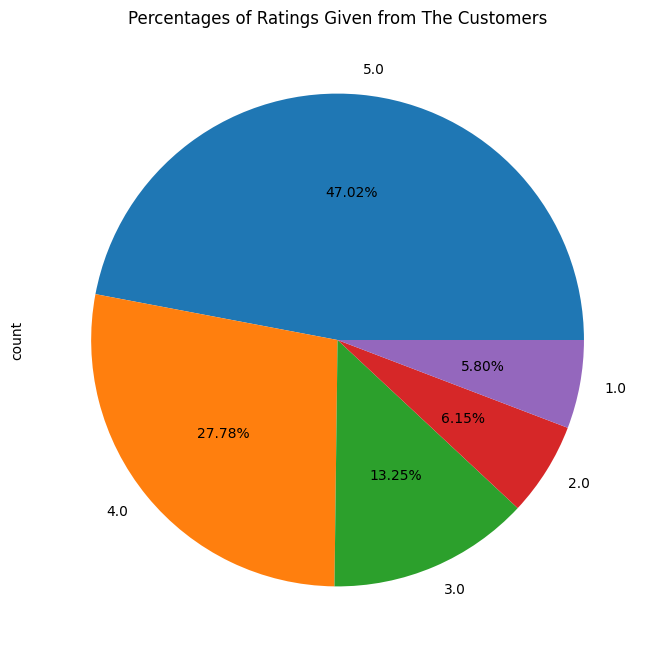

In [ ]:
data["rounded_rating"].value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

*We denote that ratings above 3 are positive, ratings equal to 3 are neutral, and ratings under 3 are negative.*

**Labelling Based on Ratings given**

In [ ]:
def labelling_sentiment(rating):
  if(rating > 3.0):
    Label = "Positive"
  elif(rating < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [ ]:
data["sentiment"] = data['rounded_rating'].apply(labelling_sentiment)

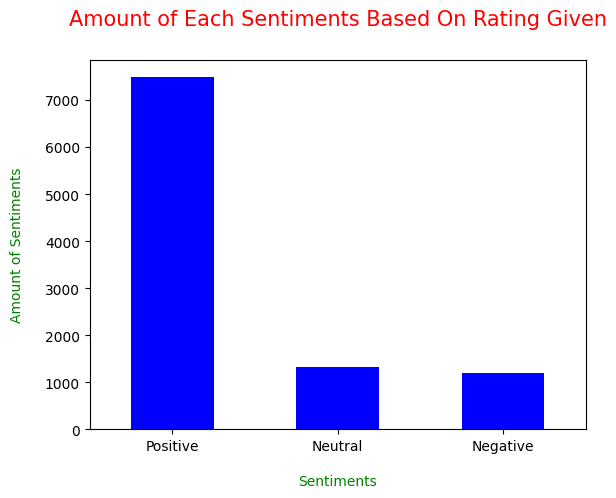

In [ ]:
data["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

# **Text Pre-processing**

In [ ]:
# Define text preprocessing function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, special characters
    text = re.sub(r'[^a-z\s]', '', text)

    #Remove numbers
    text = re.sub(r'\d+', '', text)

    #Remove newline character
    text = re.sub('\n','',text)

    # Remove possible links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    return text

In [ ]:
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def process_text(text):
    processed_text = list()
    Lemmatizer = WordNetLemmatizer()

    tokens = nltk.word_tokenize(text)

    for word in tokens:
        if word not in Stopwords:
            processed_text.append(Lemmatizer.lemmatize(word))

    return " ".join(processed_text)


data['reviews'] = data['reviews'].apply(clean_text)
data['reviews'] = data['reviews'].apply(process_text)
data.head()

,reviews,rounded_rating,sentiment
0,experience rancho valencia absolutely perfect ...,5.0,Positive
1,amazing place everyone extremely warm welcomin...,5.0,Positive
2,booked night stay rancho valencia play tennis ...,5.0,Positive
3,currently bed writing past hr dog barking sque...,2.0,Negative
4,live md aloft home away homewe stayed night st...,5.0,Positive


# Dataset Analysis and Experiments
When preparing for sentiment analysis, conducting thorough experiments can greatly increase our understanding of the dataset and improve model performance.

## Word Distribution
Analyzing the frequency of words in our dataset can help us get some basic insights into our data, and help guide our future experiments.

It will help us understand if individual words can be used to discriminate between the different sentiment classes

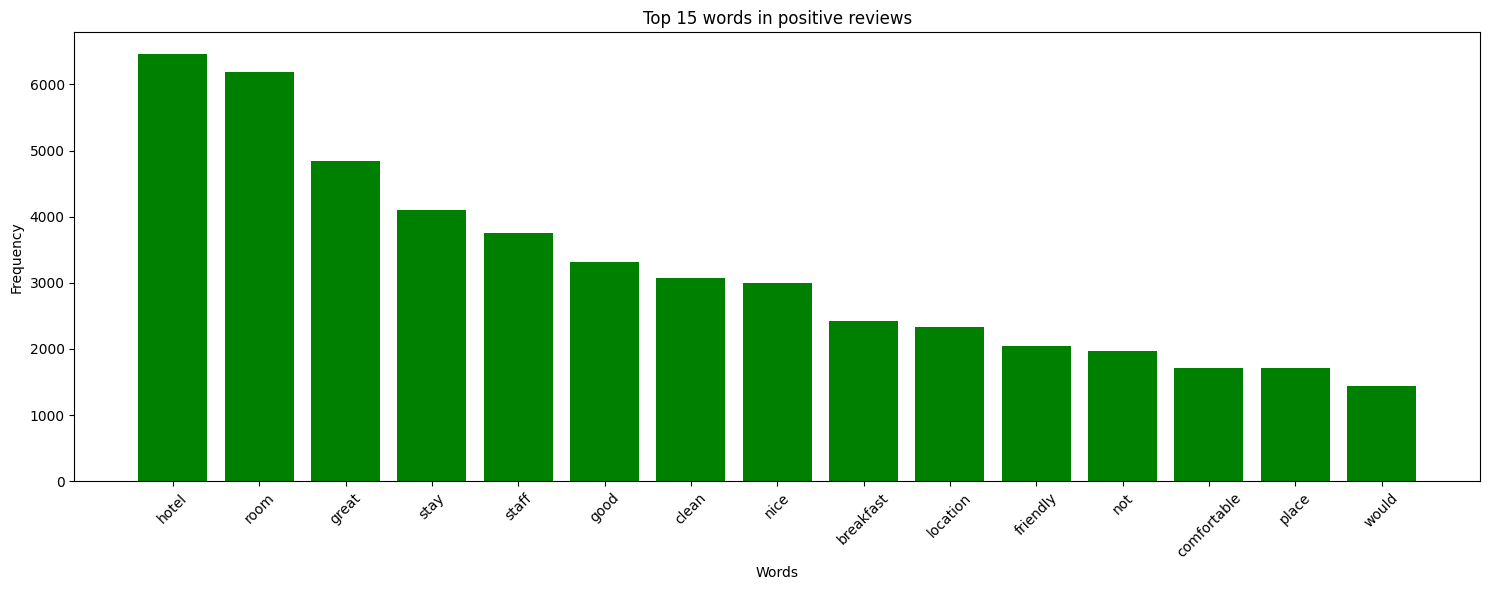

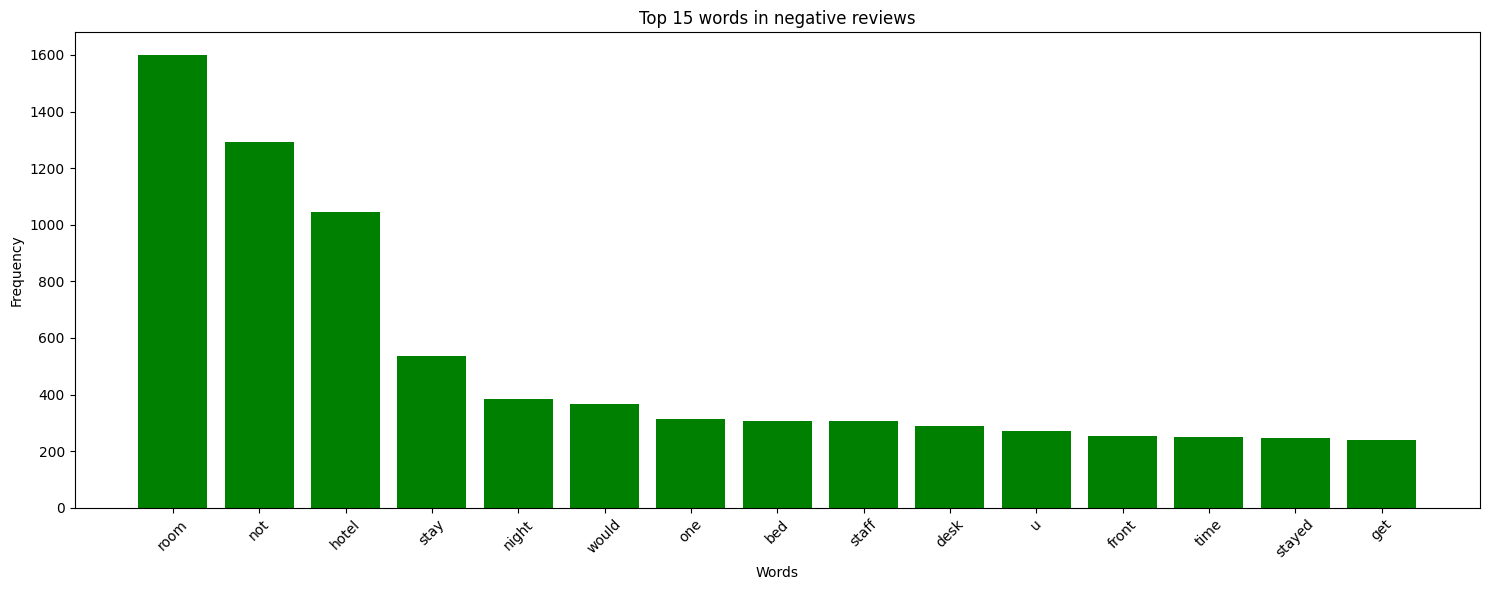

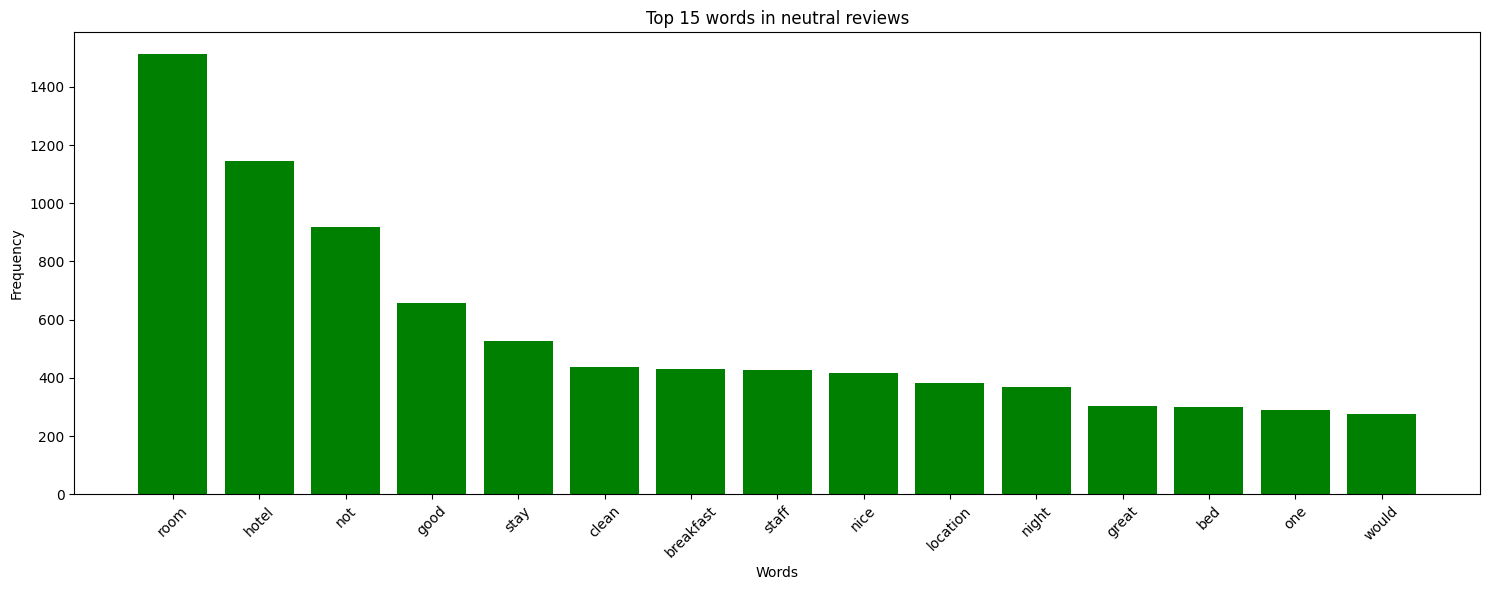

In [ ]:
# Calculate word frequencies for each sentiment class
def calculate_word_frequencies(data, sentiment):
    texts = data[data['sentiment'] == sentiment]['reviews']
    words = []
    for text in texts:
        words.extend(nltk.word_tokenize(text))
    return nltk.FreqDist(words)

positive_freq = calculate_word_frequencies(data, 'Positive')
negative_freq = calculate_word_frequencies(data, 'Negative')
neutral_freq = calculate_word_frequencies(data, 'Neutral')

# Function to plot word frequencies
def plot_word_frequencies(freq_dist, title):
    common_words = freq_dist.most_common(15)
    words, frequencies = zip(*common_words)
    plt.figure(figsize=(15, 6))
    plt.bar(words, frequencies, color='green')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting for each sentiment class
plot_word_frequencies(positive_freq, 'Top 15 words in positive reviews')
plot_word_frequencies(negative_freq, 'Top 15 words in negative reviews')
plot_word_frequencies(neutral_freq, 'Top 15 words in neutral reviews')

From this experiment, it is clear that the common words between the different sentiment classes have significant overlap. This means that singular words would not be effective at discrimating the sentiment classes.

## N-gram analysis
N-gram analysis simply means we consider sequences of words instead of singular words. This manages to capture context which is beyond single words.

### Bigram Analysis

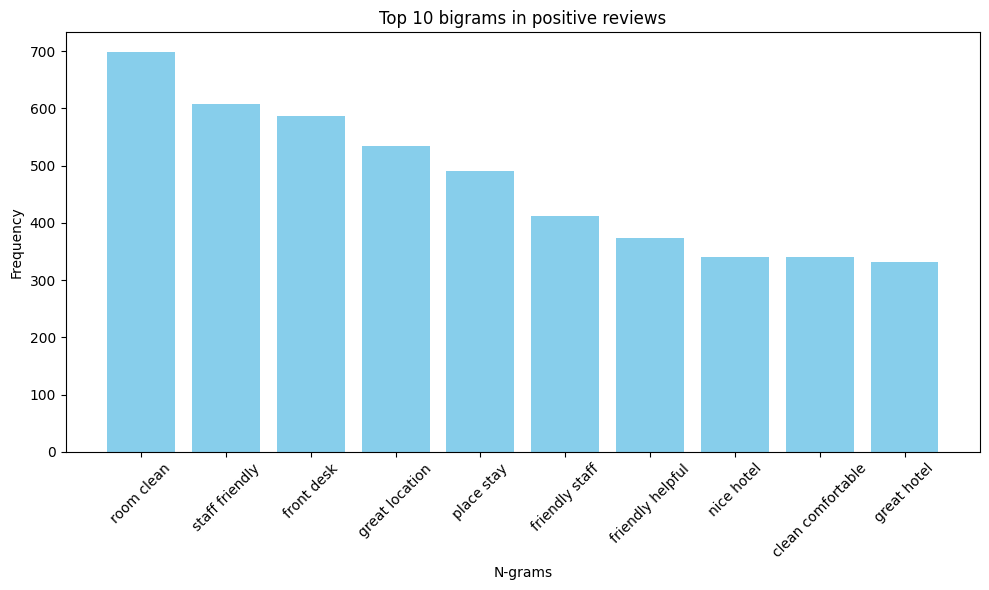

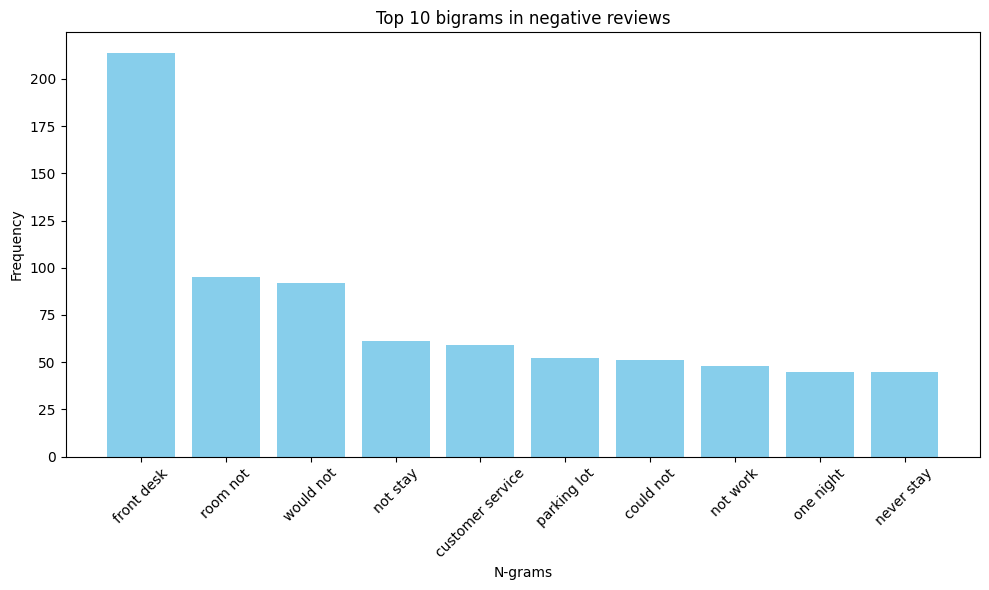

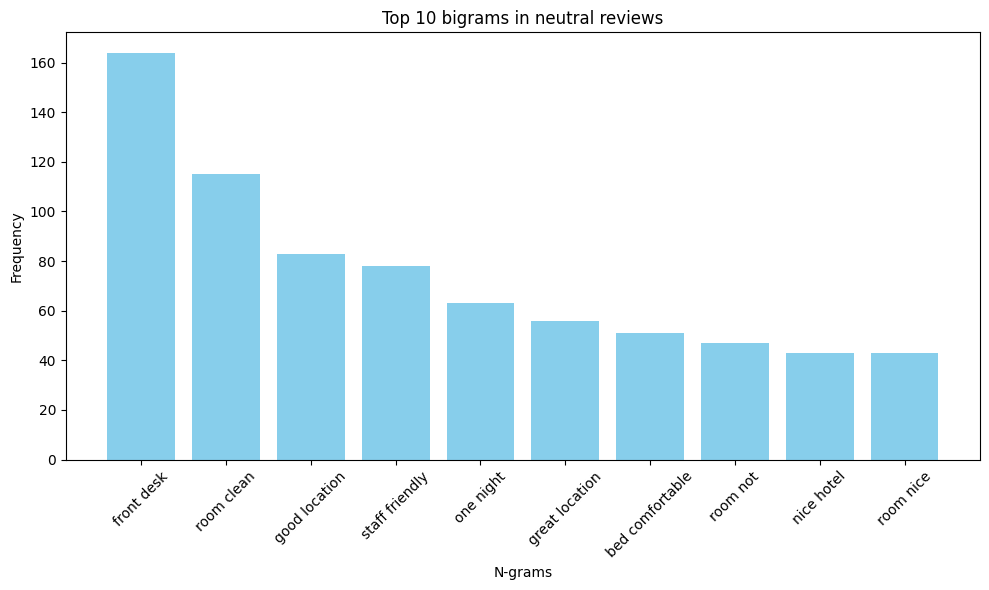

In [ ]:
from nltk import ngrams

def calculate_ngram_frequencies(df, sentiment, n=2):
    texts = df[df['sentiment'] == sentiment]['reviews']
    ngrams_list = []
    for text in texts:
        tokens = nltk.word_tokenize(text)
        ngrams_list.extend(ngrams(tokens, n))
    return nltk.FreqDist(ngrams_list)


def plot_ngram_frequencies(freq_dist, title):
    if len(freq_dist) == 0:
        print(f"No n-grams to display for {title}")
        return

    common_ngrams = freq_dist.most_common(10)
    ngrams, frequencies = zip(*common_ngrams)
    ngram_strings = [' '.join(ngram) for ngram in ngrams]  # Convert tuples to strings

    plt.figure(figsize=(10, 6))
    plt.bar(ngram_strings, frequencies, color='skyblue')
    plt.title(title)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

positive_bigram_freq = calculate_ngram_frequencies(data, 'Positive', n=2)
negative_bigram_freq = calculate_ngram_frequencies(data, 'Negative', n=2)
neutral_bigram_freq = calculate_ngram_frequencies(data, 'Neutral', n=2)

plot_ngram_frequencies(positive_bigram_freq, 'Top 10 bigrams in positive reviews')
plot_ngram_frequencies(negative_bigram_freq, 'Top 10 bigrams in negative reviews')
plot_ngram_frequencies(neutral_bigram_freq, 'Top 10 bigrams in neutral reviews')

## Trigram Analysis

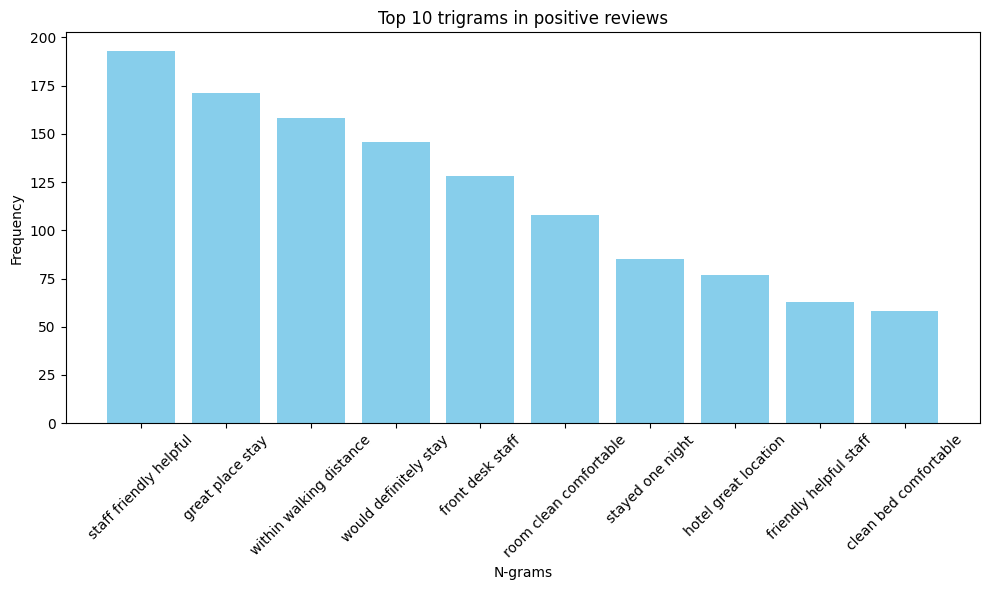

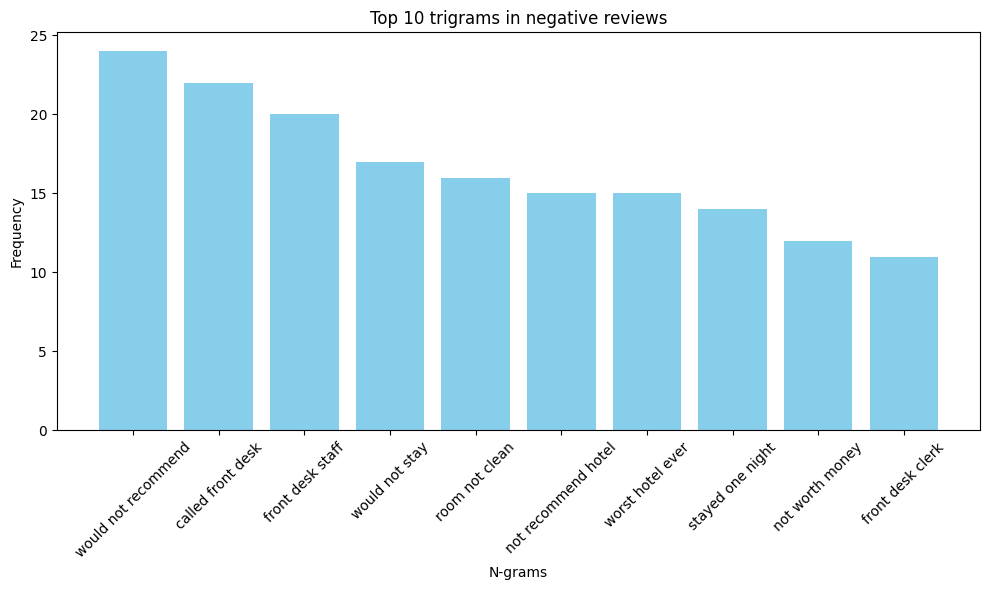

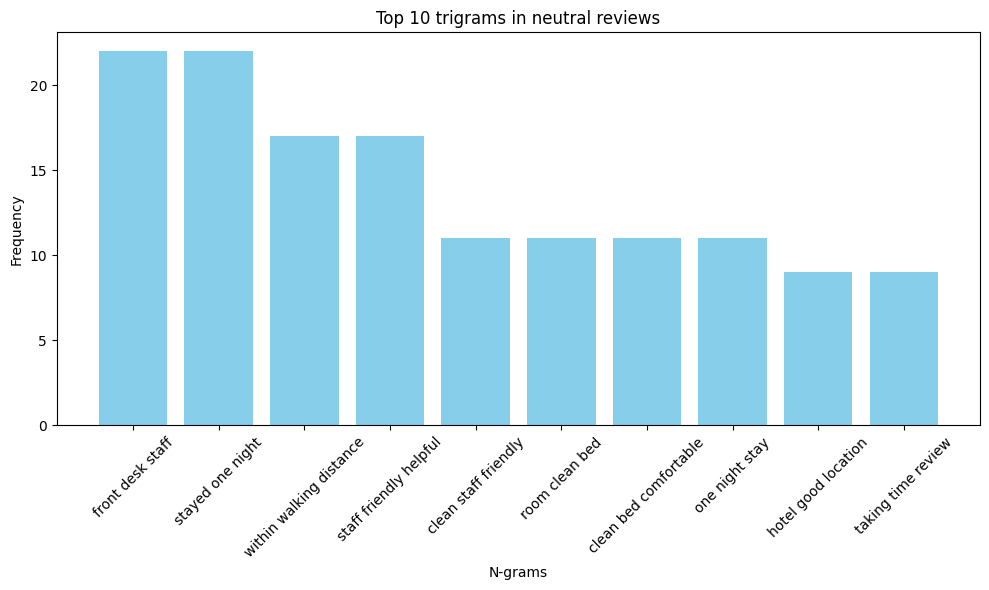

In [ ]:
positive_trigram_freq = calculate_ngram_frequencies(data, 'Positive', n=3)
negative_trigram_freq = calculate_ngram_frequencies(data, 'Negative', n=3)
neutral_trigram_freq = calculate_ngram_frequencies(data, 'Neutral', n=3)

plot_ngram_frequencies(positive_trigram_freq, 'Top 10 trigrams in positive reviews')
plot_ngram_frequencies(negative_trigram_freq, 'Top 10 trigrams in negative reviews')
plot_ngram_frequencies(neutral_trigram_freq, 'Top 10 trigrams in neutral reviews')

N-grams look more promising in terms of being able to capture more context and discriminate between the sentiment classes. We will keep this in mind when we proceed with our feature engineering later.

We have to also consider contradictions and how this might affect our n-gram analysis. For example "not very good" and "very good" although contradicting each other, would be equivalent to a bigram feature.

# Feature Engineering

## Bag of Words
The simplest way to convert text into a structured feature is the *Bag of Words* method. We construct a bag-of-words vector for each text, which is just a vector of words and their word count in the text

...

### Bag of n-grams

...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(data['reviews'])

print("Bag of Words Feature Names (first 10):", bow_vectorizer.get_feature_names_out()[:10])  # Display first 10 features
print("Bag of Words Shape:", X_bow.shape)

# Bag of N-grams
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))  # Unigrams and bigrams
X_ngrams = ngram_vectorizer.fit_transform(data['reviews'])

print("N-grams Feature Names (first 10):", ngram_vectorizer.get_feature_names_out()[:10])  # Display first 10 features
print("N-grams Shape:", X_ngrams.shape)



Bag of Words Feature Names (first 10): ['aaa' 'aamiaisen' 'aamupala' 'aaron' 'aarp' 'ab' 'aback' 'abandoned'
 'abbiamo' 'abbondante']
Bag of Words Shape: (10000, 17805)
N-grams Feature Names (first 10): ['aaa card' 'aaa club' 'aaa discount' 'aaa member' 'aaa mind'
 'aaa opportunity' 'aaa property' 'aaa rate' 'aaa similar' 'aaa travel']
N-grams Shape: (10000, 175280)


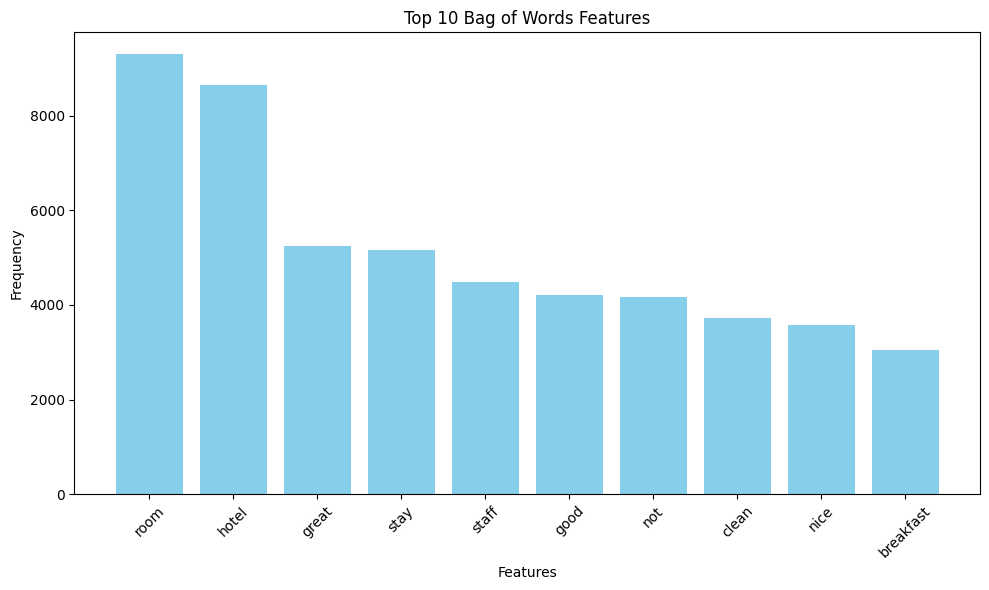

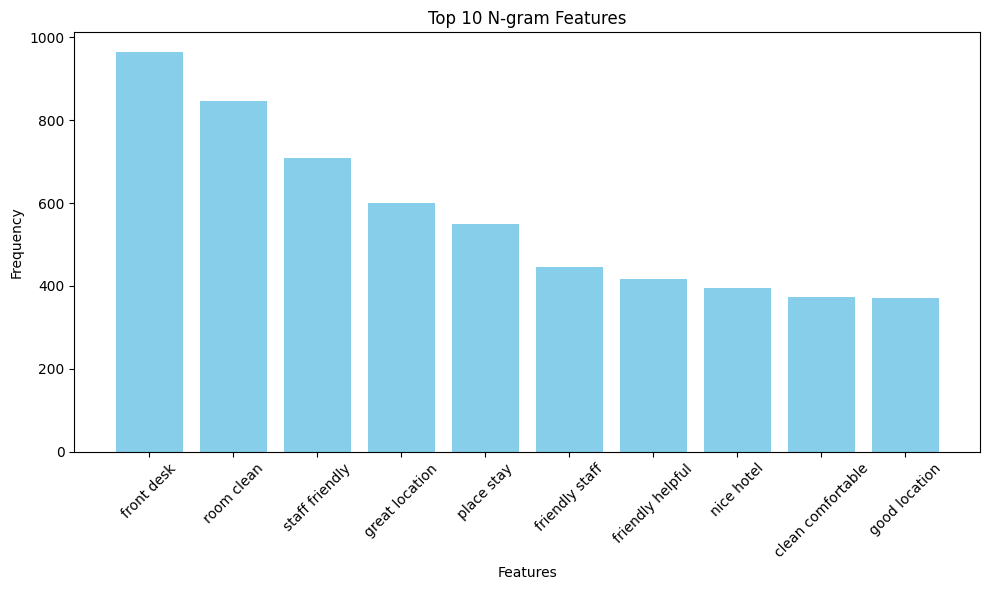

In [ ]:
def plot_frequencies(feature_names, frequencies, title):
    freq_df = pd.DataFrame({'feature': feature_names, 'frequency': frequencies})
    freq_df = freq_df.sort_values(by='frequency', ascending=False).head(10)  # Top 10

    plt.figure(figsize=(10, 6))
    plt.bar(freq_df['feature'], freq_df['frequency'], color='skyblue')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

bow_feature_names = bow_vectorizer.get_feature_names_out()
bow_frequencies = np.array(X_bow.sum(axis=0)).flatten()
plot_frequencies(bow_feature_names, bow_frequencies, 'Top 10 Bag of Words Features')

ngram_feature_names = ngram_vectorizer.get_feature_names_out()
ngram_frequencies = np.array(X_ngrams.sum(axis=0)).flatten()
plot_frequencies(ngram_feature_names, ngram_frequencies, 'Top 10 N-gram Features')

## TF-IDF

A statistical measure used to evaluate the importance of a word (or n-gram)

In [ ]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['reviews'])

print("TF-IDF Feature Names (first 10):", tfidf_vectorizer.get_feature_names_out()[:10])  # Display first 10 features
print("TF-IDF Shape:", X_tfidf.shape)

#TF-IDF of n-grams
tfidf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf_ngram = tfidf_ngram_vectorizer.fit_transform(data['reviews'])

print("TF-IDF(n-grams) Feature Names (first 10):", tfidf_ngram_vectorizer.get_feature_names_out()[:10])  # Display first 10 features
print("TF-IDF(n-grams) Shape:", X_tfidf_ngram.shape)

TF-IDF Feature Names (first 10): ['aaa' 'aamiaisen' 'aamupala' 'aaron' 'aarp' 'ab' 'aback' 'abandoned'
 'abbiamo' 'abbondante']
TF-IDF Shape: (10000, 17805)
TF-IDF(n-grams) Feature Names (first 10): ['aaa card' 'aaa club' 'aaa discount' 'aaa member' 'aaa mind'
 'aaa opportunity' 'aaa property' 'aaa rate' 'aaa similar' 'aaa travel']
TF-IDF(n-grams) Shape: (10000, 175280)


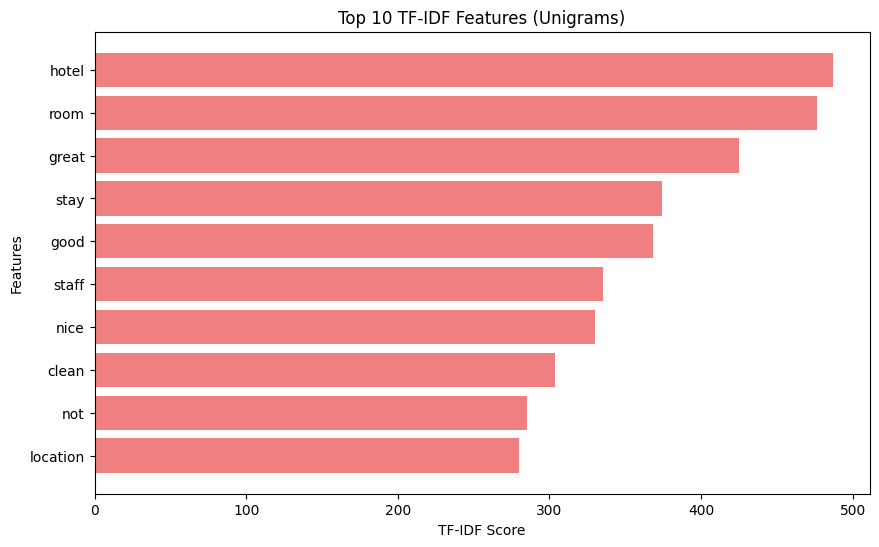

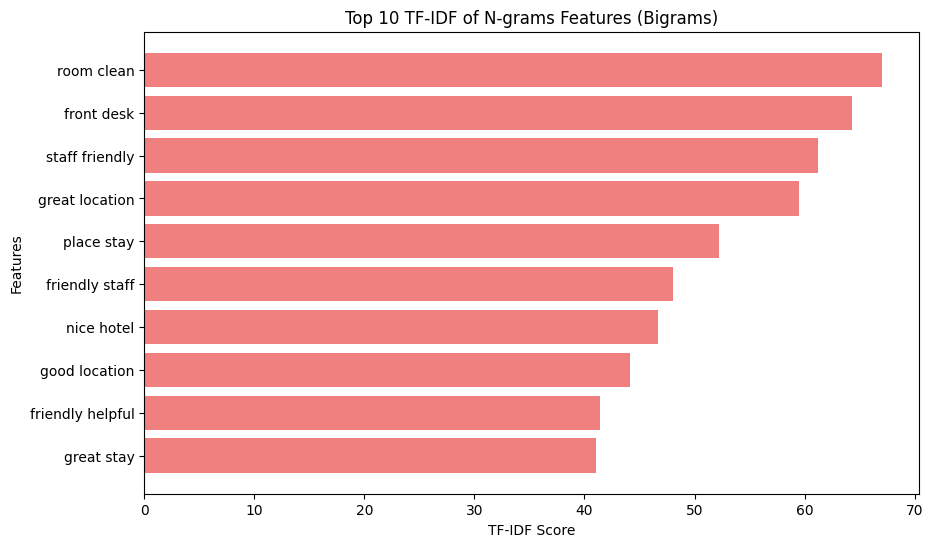

In [ ]:
def plot_tfidf_frequencies(feature_names, scores, title):
    freq_df = pd.DataFrame({'feature': feature_names, 'score': scores})
    #freq_df = freq_df.sort_values(by='score', ascending=False).head(10)  # Top 10
    freq_df = freq_df.nlargest(10, 'score')

    plt.figure(figsize=(10, 6))

    plt.barh(freq_df['feature'], freq_df['score'], color='lightcoral')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Features')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Sum TF-IDF scores for each feature across all documents
tfidf_scores = np.sum(X_tfidf.toarray(), axis=0)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_tfidf_frequencies(tfidf_feature_names, tfidf_scores, 'Top 10 TF-IDF Features (Unigrams)')

# Sum TF-IDF scores for each bigram across all documents
tfidf_ngram_scores = np.sum(X_tfidf_ngram.toarray(), axis=0)
tfidf_ngram_feature_names = tfidf_ngram_vectorizer.get_feature_names_out()
plot_tfidf_frequencies(tfidf_ngram_feature_names, tfidf_ngram_scores, 'Top 10 TF-IDF of N-grams Features (Bigrams)')

*The higher the TF-IDF score, the word(s) is more important for identifying and distinguishing the text.*

# Split the dataset



In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
data["sentiment"] = Encoder.fit_transform(data["sentiment"])

data["sentiment"].value_counts()

,count
sentiment,
2,7480
1,1325
0,1195


`Positive` is encoded into 2, `Neutral` into 1, and `Negative` into 0

In [ ]:
# Declaring our target variable
y = data["sentiment"]

**Resampling dataset**

Our label 'sentiment' distribution is not balanced, hence need to resample  

**Train-test-split**



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Bag of Words Train-test-split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size = 0.2, random_state = 42)

# Bag of N-grams Train-test-split
X_train_ngrams, X_test_ngrams, y_train_ngrams, y_test_ngrams = train_test_split(X_ngrams, y, test_size = 0.2, random_state = 42)

# TF-IDF Train-test-split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 42)

# TF-IDF of N-grams Train-test-split
X_train_tfidf_ngram, X_test_tfidf_ngram, y_train_tfidf_ngram, y_test_tfidf_ngram = train_test_split(X_tfidf_ngram, y, test_size = 0.2, random_state = 42)

# Naive Bayes Classifer

Train and evaluate on all feature representations

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

**Multinomial NB**

In [ ]:
mnb_bow = MultinomialNB()
accuracy_bow, report_bow = train_and_evaluate(mnb_bow, X_train_bow, X_test_bow, y_train_bow, y_test_bow)

mnb_ngrams = MultinomialNB()
accuracy_ngrams, report_ngrams = train_and_evaluate(mnb_ngrams, X_train_ngrams, X_test_ngrams, y_train_ngrams, y_test_ngrams)

mnb_tfidf = MultinomialNB()
accuracy_tfidf, report_tfidf = train_and_evaluate(mnb_tfidf, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)

mnb_tfidf_ngram = MultinomialNB()
accuracy_tfidf_ngram, report_tfidf_ngram = train_and_evaluate(mnb_tfidf_ngram, X_train_tfidf_ngram, X_test_tfidf_ngram, y_train_tfidf_ngram, y_test_tfidf_ngram)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# MultinomialNB Results
print("MultinomialNB - Bag of Words\n", report_bow)
print("MultinomialNB - N-grams\n", report_ngrams)
print("MultinomialNB - TF-IDF\n", report_tfidf)
print("MultinomialNB - TF-IDF N-grams\n", report_tfidf_ngram)

MultinomialNB - Bag of Words
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       221
           1       0.42      0.16      0.23       279
           2       0.86      0.96      0.91      1500

    accuracy                           0.82      2000
   macro avg       0.65      0.60      0.61      2000
weighted avg       0.78      0.82      0.79      2000

MultinomialNB - N-grams
               precision    recall  f1-score   support

           0       0.58      0.65      0.61       221
           1       0.31      0.37      0.34       279
           2       0.89      0.85      0.87      1500

    accuracy                           0.76      2000
   macro avg       0.60      0.62      0.61      2000
weighted avg       0.78      0.76      0.77      2000

MultinomialNB - TF-IDF
               precision    recall  f1-score   support

           0       1.00      0.03      0.05       221
           1       0.50      0.01      0.01       

**Bernoulli NB**

In [ ]:
bnb_bow = BernoulliNB()
accuracy_bow_bnb, report_bow_bnb = train_and_evaluate(bnb_bow, X_train_bow, X_test_bow, y_train_bow, y_test_bow)

bnb_ngrams = BernoulliNB()
accuracy_ngrams_bnb, report_ngrams_bnb = train_and_evaluate(bnb_ngrams, X_train_ngrams, X_test_ngrams, y_train_ngrams, y_test_ngrams)

bnb_tfidf = BernoulliNB()
accuracy_tfidf_bnb, report_tfidf_bnb = train_and_evaluate(bnb_tfidf, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)

bnb_tfidf_ngram = BernoulliNB()
accuracy_tfidf_ngram_bnb, report_tfidf_ngram_bnb = train_and_evaluate(bnb_tfidf_ngram, X_train_tfidf_ngram, X_test_tfidf_ngram, y_train_tfidf_ngram, y_test_tfidf_ngram)

In [ ]:
# BernoulliNB Results
print("BernoulliNB - Bag of Words\n", report_bow_bnb)
print("BernoulliNB - N-grams\n", report_ngrams_bnb)
print("BernoulliNB - TF-IDF\n", report_tfidf_bnb)
print("BernoulliNB - TF-IDF N-grams\n", report_tfidf_ngram_bnb)

BernoulliNB - Bag of Words
               precision    recall  f1-score   support

           0       0.74      0.44      0.55       221
           1       0.39      0.13      0.19       279
           2       0.82      0.97      0.89      1500

    accuracy                           0.79      2000
   macro avg       0.65      0.51      0.54      2000
weighted avg       0.75      0.79      0.75      2000

BernoulliNB - N-grams
               precision    recall  f1-score   support

           0       0.88      0.03      0.06       221
           1       0.36      0.04      0.07       279
           2       0.76      0.99      0.86      1500

    accuracy                           0.75      2000
   macro avg       0.66      0.35      0.33      2000
weighted avg       0.71      0.75      0.66      2000

BernoulliNB - TF-IDF
               precision    recall  f1-score   support

           0       0.74      0.44      0.55       221
           1       0.39      0.13      0.19       279
  

**Gaussian NB**

In [ ]:
# Function to convert a smaller subset of the dataset to dense format and evaluate GaussianNB
def evaluate_gaussian_nb(X, y):
    # Sample a smaller subset of the data
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.2, random_state=42)

    # Convert to dense format
    X_sample_dense = X_sample.toarray()

    # Split the sampled data
    X_train, X_test, y_train, y_test = train_test_split(X_sample_dense, y_sample, test_size=0.2, random_state=42)

    # Train and evaluate GaussianNB
    gnb = GaussianNB()
    accuracy, report = train_and_evaluate(gnb, X_train, X_test, y_train, y_test)

    return accuracy, report

# Apply the function to different feature sets

# Bag of Words
accuracy_bow_gnb, report_bow_gnb = evaluate_gaussian_nb(X_bow, y)

# N-grams
accuracy_ngrams_gnb, report_ngrams_gnb = evaluate_gaussian_nb(X_ngrams, y)

# TF-IDF
accuracy_tfidf_gnb, report_tfidf_gnb = evaluate_gaussian_nb(X_tfidf, y)

# TF-IDF of N-grams
accuracy_tfidf_ngram_gnb, report_tfidf_ngram_gnb = evaluate_gaussian_nb(X_tfidf_ngram, y)

In [ ]:
# GaussianNB Results
print("GaussianNB - Bag of Words\n", report_bow_gnb)
print("GaussianNB - N-grams\n", report_ngrams_gnb)
print("GaussianNB - TF-IDF\n", report_tfidf_gnb)
print("GaussianNB - TF-IDF N-grams\n", report_tfidf_ngram_gnb)

GaussianNB - Bag of Words
               precision    recall  f1-score   support

           0       0.32      0.29      0.30        42
           1       0.11      0.21      0.15        47
           2       0.84      0.74      0.79       311

    accuracy                           0.63       400
   macro avg       0.42      0.41      0.41       400
weighted avg       0.70      0.63      0.66       400

GaussianNB - N-grams
               precision    recall  f1-score   support

           0       0.50      0.26      0.34        42
           1       0.31      0.19      0.24        47
           2       0.84      0.94      0.89       311

    accuracy                           0.78       400
   macro avg       0.55      0.47      0.49       400
weighted avg       0.74      0.78      0.75       400

GaussianNB - TF-IDF
               precision    recall  f1-score   support

           0       0.30      0.31      0.30        42
           1       0.12      0.19      0.15        47
     

**Hyper-Parameter Tuning**

Tuning and cross-validation 10 folds to select best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Broadened range of alpha
}

# Instantiate the model
mnb = MultinomialNB()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train_bow, y_train_bow)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Parameters: {'alpha': 1}
Best Score: 0.821375


Trains model with selected parameters, evaluate performance on test data

In [ ]:
# Refit the model with the best parameters
best_alpha = grid_search.best_params_['alpha']  # Get the best alpha from grid search
best_mnb = MultinomialNB(alpha=best_alpha)
best_mnb.fit(X_train_bow, y_train_bow)

# Predict on the test set
y_pred_bow = best_mnb.predict(X_test_bow)

# Evaluate performance
accuracy_bow_best = accuracy_score(y_test_bow, y_pred_bow)
report_bow_best = classification_report(y_test_bow, y_pred_bow)

print("Best Accuracy (MultinomialNB - Bag of Words):", accuracy_bow_best)
print("Best Classification Report (MultinomialNB - Bag of Words):\n", report_bow_best)

Best Accuracy (MultinomialNB - Bag of Words): 0.817
Best Classification Report (MultinomialNB - Bag of Words):
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       221
           1       0.42      0.16      0.23       279
           2       0.86      0.96      0.91      1500

    accuracy                           0.82      2000
   macro avg       0.65      0.60      0.61      2000
weighted avg       0.78      0.82      0.79      2000



**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

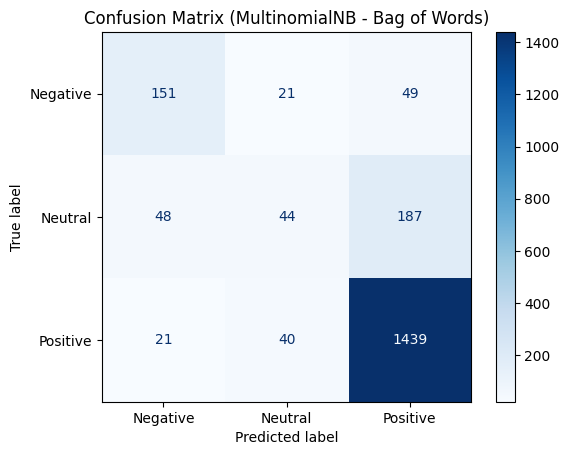

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_bow, y_pred_bow)

# Create a confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Encoder.classes_)

# Plot confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (MultinomialNB - Bag of Words)')
plt.show()


# Conclusion

**Model**

We tried the different Naive Bayes Classifier models using different feature engineering methods. After evaluation, we found that Multinomial NB Model with Bag of Words has the best performance.

The model works great for identifying positive sentiments but not neutral. As seen from the matrix, most neutrals are predicted to be positive. This could be due to the uneven data samples, with most being of positive sentiments.

For negative, it works fine as well although not as efficient as identifying positives.

The team could gather a more equally spread 'neutral', 'negative', 'positive' dataset to be able to train the model efficiently for use in future predictions.